ds^{2} = (1 - {qcos\theta\over r})^{2\over 1 + \alpha^{2}}\lbrace dr^2+r^2d\theta^2+r^2sin^2\theta d\varphi^2\rbrace -{dt^2\over  (1 - {qcos\theta\over r})^{2\over 1 + \alpha^{2}}}\, .\label{eq:sps1}



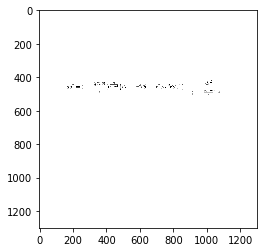

In [12]:
%matplotlib inline
from torch.utils import data
from PIL import Image
import os
import matplotlib.pyplot as plt

class Dataset(data.Dataset):
    def __init__(self,data_filename, formula_filename, transform =None):
        self.data_filename = data_filename
        self.formula_filename = formula_filename
        self.files = open(self.data_filename,'r').readlines()
        self.formulas = open(self.formula_filename,'r').readlines()
        self.transform = transform
    def __len__(self):
        return len(self.files)
    def __getitem__(self, index):
        line_num, img_file = self.files[index].strip().split()[0:2]
        img_file += ".png"
        img_path = os.path.join('formula_images/', img_file)
        #image = io.imread(img_path)
        image = Image.open(img_path)
        image = Image.Image.crop(image,box=[200,0,1500,1300])
        formula = self.formulas[int(line_num)]
        if self.transform:
            image = self.transform(image)
        return image, formula

dataset_train = Dataset('im2latex_train.lst','im2latex_formulas.lst')

img , label = dataset_train[0]
print(label)
plt.imshow(img)
plt.show()